# Feature Engineering(Dhaka-2018 Dataset) 

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aqi_data = pd.read_csv("F:\\CLASS\\CSE498R(Directed Research)\\Dataset\\Dhaka\\real_2018.csv")

In [3]:
aqi_data.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,-,-,-,-,-,-,-,-,333.0,EU
1,2,-,-,-,-,-,-,-,-,280.0,VU
2,3,18.6,24.6,14.2,1011.8,48,3.2,3.5,9.4,264.0,VU
3,4,15.7,21.8,10.5,1013.4,69,2.7,3.5,5.4,315.0,EU
4,5,16.3,22.5,11.5,1011.5,78,1.9,2,3.5,336.0,EU


In [4]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   D         365 non-null    object 
 1   T         218 non-null    object 
 2   TM        218 non-null    object 
 3   Tm        218 non-null    object 
 4   SLP       218 non-null    object 
 5   H         218 non-null    object 
 6   VV        218 non-null    object 
 7   V         218 non-null    object 
 8   VM        218 non-null    object 
 9   AQI       361 non-null    float64
 10  Category  361 non-null    object 
dtypes: float64(1), object(10)
memory usage: 31.5+ KB


In [5]:
pd.options.display.max_columns = None
display(aqi_data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,-,-,-,-,-,-,-,-,333.0,EU
1,2,-,-,-,-,-,-,-,-,280.0,VU
2,3,18.6,24.6,14.2,1011.8,48,3.2,3.5,9.4,264.0,VU
3,4,15.7,21.8,10.5,1013.4,69,2.7,3.5,5.4,315.0,EU
4,5,16.3,22.5,11.5,1011.5,78,1.9,2,3.5,336.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,-,-,-,-,-,-,-,-,259.0,VU
361,28,-,-,-,-,-,-,-,-,261.0,VU
362,29,-,-,-,-,-,-,-,-,225.0,VU
363,30,-,-,-,-,-,-,-,-,210.0,VU


In [6]:
aqi_data.isnull().sum()

D             0
T           147
TM          147
Tm          147
SLP         147
H           147
VV          147
V           147
VM          147
AQI           4
Category      4
dtype: int64

In [7]:
aqi = aqi_data.replace("-",np.nan)
aqi

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333.0,EU
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.0,VU
2,3,18.6,24.6,14.2,1011.8,48,3.2,3.5,9.4,264.0,VU
3,4,15.7,21.8,10.5,1013.4,69,2.7,3.5,5.4,315.0,EU
4,5,16.3,22.5,11.5,1011.5,78,1.9,2,3.5,336.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.0,VU
361,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,VU
362,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,VU
363,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,VU


In [8]:
aqi.isnull().sum()

D             0
T           207
TM          207
Tm          207
SLP         207
H           207
VV          207
V           207
VM          215
AQI           4
Category      4
dtype: int64

<AxesSubplot:>

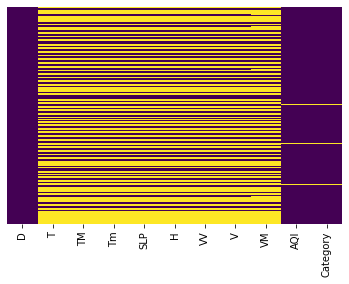

In [9]:
sns.heatmap(aqi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 
T = Average Temperature (°C) , TM = Maximum temperature (°C), 

Tm = Minimum temperature (°C), SLP= Atmospheric pressure at sea level (hPa), 

H = Average relative humidity (%), VV = Average visibility (Km),

V = Average wind speed (Km/h), VM = Maximum sustained wind speed (Km/h), AQI = Air Quality Index


## Convert object type as float type

In [10]:
aqi['T'] = aqi['T'].replace({'NAN':np.nan}).astype(float)
aqi['TM'] = aqi['TM'].replace({'NAN':np.nan}).astype(float)
aqi['Tm'] = aqi['Tm'].replace({'NAN':np.nan}).astype(float)
aqi['SLP'] = aqi['SLP'].replace({'NAN':np.nan}).astype(float)
aqi['H'] = aqi['H'].replace({'NAN':np.nan}).astype(float)
aqi['VV'] = aqi['VV'].replace({'NAN':np.nan}).astype(float)
aqi['V'] = aqi['V'].replace({'NAN':np.nan}).astype(float)
aqi['VM'] = aqi['VM'].replace({'NAN':np.nan}).astype(float)

# Month-1(January)

Find monthly mean

In [11]:
df1 = aqi.iloc[0:31,0:11]
df1.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333.0,EU
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.0,VU
2,3,18.6,24.6,14.2,1011.8,48.0,3.2,3.5,9.4,264.0,VU
28,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,517.0,EU
29,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0,EU
30,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,434.0,EU


In [12]:
df1.isnull().sum()

D            0
T           22
TM          22
Tm          22
SLP         22
H           22
VV          22
V           22
VM          24
AQI          0
Category     0
dtype: int64

In [13]:
df1["T"] = df1["T"].fillna(value=df1["T"].mean())
df1["TM"] = df1["TM"].fillna(value=df1["TM"].mean())
df1["Tm"] = df1["Tm"].fillna(value=df1["Tm"].mean())
df1["SLP"] = df1["SLP"].fillna(value=df1["SLP"].mean())
df1["H"] = df1["H"].fillna(value=df1["H"].mean())
df1["VV"] = df1["VV"].fillna(value=df1["VV"].mean())
df1["V"] = df1["V"].fillna(value=df1["V"].mean())
df1["VM"] = df1["VM"].fillna(value=df1["VM"].mean())

In [14]:
df1.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,16.788889,22.522222,12.111111,1012.611111,68.222222,2.344444,1.7,5.428571,333.0,EU
1,2,16.788889,22.522222,12.111111,1012.611111,68.222222,2.344444,1.7,5.428571,280.0,VU
2,3,18.600000,24.600000,14.200000,1011.800000,48.000000,3.200000,3.5,9.400000,264.0,VU
3,4,15.700000,21.800000,10.500000,1013.400000,69.000000,2.700000,3.5,5.400000,315.0,EU
4,5,16.300000,22.500000,11.500000,1011.500000,78.000000,1.900000,2.0,3.500000,336.0,EU


In [15]:
df1.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-2 (February)

In [16]:
df2 = aqi.iloc[31:59,0:11]
df2.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,20.7,25.5,14.4,1011.2,59.0,2.6,0.7,3.5,359.0,EU
32,2,20.8,25.8,17.6,1011.8,73.0,1.3,0.0,NaN,548.0,EU
33,3,20.1,25.5,16.0,1012.5,79.0,1.1,0.0,NaN,557.0,EU
56,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,VU
57,27,25.3,31.0,19.0,1010.8,71.0,3.9,0.9,3.5,286.0,VU
58,28,25.8,31.8,20.4,1010.3,57.0,4.3,1.3,3.5,279.0,VU


In [17]:
df2.isnull().sum()

D            0
T           14
TM          14
Tm          14
SLP         14
H           14
VV          14
V           14
VM          16
AQI          0
Category     0
dtype: int64

In [18]:
df2["T"] = df2["T"].fillna(value=df2["T"].mean())
df2["TM"] = df2["TM"].fillna(value=df2["TM"].mean())
df2["Tm"] = df2["Tm"].fillna(value=df2["Tm"].mean())
df2["SLP"] = df2["SLP"].fillna(value=df2["SLP"].mean())
df2["H"] = df2["H"].fillna(value=df2["H"].mean())
df2["VV"] = df2["VV"].fillna(value=df2["VV"].mean())
df2["V"] = df2["V"].fillna(value=df2["V"].mean())
df2["VM"] = df2["VM"].fillna(value=df2["VM"].mean())

In [19]:
df2.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,20.700000,25.50,14.400000,1011.200000,59.000000,2.600000,0.700000,3.500000,359.0,EU
32,2,20.800000,25.80,17.600000,1011.800000,73.000000,1.300000,0.000000,4.291667,548.0,EU
33,3,20.100000,25.50,16.000000,1012.500000,79.000000,1.100000,0.000000,4.291667,557.0,EU
34,4,23.121429,28.75,18.064286,1012.192857,57.928571,3.278571,1.064286,4.291667,376.0,EU
35,5,23.121429,28.75,18.064286,1012.192857,57.928571,3.278571,1.064286,4.291667,301.0,EU


In [20]:
df2.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-3(March)

In [21]:
df3 = aqi.iloc[59:90,0:11]
df3.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
59,Mar-01,25.9,31.5,20.4,1009.7,58.0,3.7,0.7,5.4,367.0,EU
60,2,26.7,32.6,20.8,1007.8,56.0,3.9,1.9,9.4,428.0,EU
61,3,27.4,33.8,22.0,1005.6,63.0,3.7,2.8,5.4,240.0,VU
87,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.0,U
88,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0,U
89,31,24.2,28.9,18.0,1009.6,68.0,4.8,3.7,11.1,163.0,U


In [22]:
df3.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          0
Category     0
dtype: int64

In [23]:
df3["T"] = df3["T"].fillna(value=df3["T"].mean())
df3["TM"] = df3["TM"].fillna(value=df3["TM"].mean())
df3["Tm"] = df3["Tm"].fillna(value=df3["Tm"].mean())
df3["SLP"] = df3["SLP"].fillna(value=df3["SLP"].mean())
df3["H"] = df3["H"].fillna(value=df3["H"].mean())
df3["VV"] = df3["VV"].fillna(value=df3["VV"].mean())
df3["V"] = df3["V"].fillna(value=df3["V"].mean())
df3["VM"] = df3["VM"].fillna(value=df3["VM"].mean())

In [24]:
df3.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
59,Mar-01,25.9000,31.5000,20.400,1009.70000,58.000,3.70000,0.70000,5.4000,367.0,EU
60,2,26.7000,32.6000,20.800,1007.80000,56.000,3.90000,1.90000,9.4000,428.0,EU
61,3,27.4000,33.8000,22.000,1005.60000,63.000,3.70000,2.80000,5.4000,240.0,VU
62,4,26.9625,33.1875,20.725,1009.31875,56.125,4.28125,2.05625,6.1375,227.0,VU
63,5,26.9625,33.1875,20.725,1009.31875,56.125,4.28125,2.05625,6.1375,247.0,VU


In [25]:
df3.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-4(April)

In [26]:
df4 = aqi.iloc[90:120,0:11]
df4.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
90,Apr-01,27.5,34.0,20.5,1009.4,52.0,5.1,5.0,27.8,230.0,VU
91,2,26.1,30.0,21.4,1009.9,67.0,4.0,2.0,5.4,210.0,VU
92,3,28.5,34.2,24.2,1008.3,55.0,5.0,1.3,3.5,282.0,VU
117,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.0,U
118,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.0,C
119,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,C


In [27]:
df4.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          17
AQI          0
Category     0
dtype: int64

In [28]:
df4["T"] = df4["T"].fillna(value=df4["T"].mean())
df4["TM"] = df4["TM"].fillna(value=df4["TM"].mean())
df4["Tm"] = df4["Tm"].fillna(value=df4["Tm"].mean())
df4["SLP"] = df4["SLP"].fillna(value=df4["SLP"].mean())
df4["H"] = df4["H"].fillna(value=df4["H"].mean())
df4["VV"] = df4["VV"].fillna(value=df4["VV"].mean())
df4["V"] = df4["V"].fillna(value=df4["V"].mean())
df4["VM"] = df4["VM"].fillna(value=df4["VM"].mean())

In [29]:
df4.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
90,Apr-01,27.500000,34.000000,20.50,1009.4,52.000000,5.100000,5.000000,27.800000,230.0,VU
91,2,26.100000,30.000000,21.40,1009.9,67.000000,4.000000,2.000000,5.400000,210.0,VU
92,3,28.500000,34.200000,24.20,1008.3,55.000000,5.000000,1.300000,3.500000,282.0,VU
93,4,27.486667,33.146667,21.72,1008.1,66.333333,4.713333,3.093333,11.507692,305.0,EU
94,5,27.486667,33.146667,21.72,1008.1,66.333333,4.713333,3.093333,11.507692,204.0,VU


In [30]:
df4.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-5 (May)

In [31]:
df5 = aqi.iloc[120:151,0:11]
df5.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
120,May-01,27.7,33.0,21.5,1007.7,69.0,4.3,4.4,9.4,111.0,C
121,2,25.2,32.8,21.4,1007.9,79.0,5.0,4.6,9.4,149.0,C
122,3,27.8,32.5,20.8,1008.9,69.0,4.8,3.5,5.4,191.0,U
148,29,29.2,35.4,24.5,1001.6,61.0,5.1,2.6,9.4,132.0,C
149,30,30.7,35.4,26.6,1001.8,63.0,5.0,2.4,5.4,165.0,U
150,31,26.1,28.2,23.6,1004.8,88.0,4.5,0.6,3.5,84.0,M


In [32]:
df5.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          0
Category     0
dtype: int64

In [33]:
df5["T"] = df5["T"].fillna(value=df5["T"].mean())
df5["TM"] = df5["TM"].fillna(value=df5["TM"].mean())
df5["Tm"] = df5["Tm"].fillna(value=df5["Tm"].mean())
df5["SLP"] = df5["SLP"].fillna(value=df5["SLP"].mean())
df5["H"] = df5["H"].fillna(value=df5["H"].mean())
df5["VV"] = df5["VV"].fillna(value=df5["VV"].mean())
df5["V"] = df5["V"].fillna(value=df5["V"].mean())
df5["VM"] = df5["VM"].fillna(value=df5["VM"].mean())

In [34]:
df5.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
120,May-01,27.70,33.000000,21.50,1007.700000,69.000000,4.300000,4.400000,9.4,111.0,C
121,2,25.20,32.800000,21.40,1007.900000,79.000000,5.000000,4.600000,9.4,149.0,C
122,3,27.80,32.500000,20.80,1008.900000,69.000000,4.800000,3.500000,5.4,191.0,U
123,4,27.98,32.526667,23.74,1005.346667,76.533333,4.586667,3.813333,8.3,174.0,U
124,5,27.98,32.526667,23.74,1005.346667,76.533333,4.586667,3.813333,8.3,129.0,C


In [35]:
df5.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-6 (June)

In [36]:
df6 = aqi.iloc[151:181,0:11]
df6.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
151,Jun-01,26.7,32.0,23.6,1006.1,87.0,3.9,4.3,9.4,94.0,M
152,2,28.8,33.2,25.1,1004.5,83.0,4.5,2.8,5.4,98.0,M
153,3,28.0,34.2,25.4,1002.2,86.0,4.2,0.7,5.4,105.0,C
178,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,M
179,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,G
180,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,M


In [37]:
df6.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          1
Category     1
dtype: int64

In [38]:
df6["T"] = df6["T"].fillna(value=df6["T"].mean())
df6["TM"] = df6["TM"].fillna(value=df6["TM"].mean())
df6["Tm"] = df6["Tm"].fillna(value=df6["Tm"].mean())
df6["SLP"] = df6["SLP"].fillna(value=df6["SLP"].mean())
df6["H"] = df6["H"].fillna(value=df6["H"].mean())
df6["VV"] = df6["VV"].fillna(value=df6["VV"].mean())
df6["V"] = df6["V"].fillna(value=df6["V"].mean())
df6["VM"] = df6["VM"].fillna(value=df6["VM"].mean())
df6["AQI"] = df6["AQI"].fillna(value=df6["AQI"].mean())

In [40]:
df6.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
151,Jun-01,26.700000,32.000000,23.600000,1006.100000,87.000000,3.900000,4.300000,9.400000,94.0,M
152,2,28.800000,33.200000,25.100000,1004.500000,83.000000,4.500000,2.800000,5.400000,98.0,M
153,3,28.000000,34.200000,25.400000,1002.200000,86.000000,4.200000,0.700000,5.400000,105.0,C
154,4,29.426667,33.293333,25.913333,999.833333,80.866667,4.506667,3.526667,11.566667,161.0,U
155,5,29.426667,33.293333,25.913333,999.833333,80.866667,4.506667,3.526667,11.566667,147.0,C


In [41]:
df6.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    1
dtype: int64

# Month-7 (July)

In [42]:
df7 = aqi.iloc[181:212,0:11]
df7.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
181,Jul-01,30.3,33.2,26.9,1001.6,73.0,5.5,10.0,13.0,70.0,M
182,2,29.6,33.6,25.8,1000.7,79.0,5.3,3.9,5.4,67.0,M
183,3,27.3,29.8,25.6,999.7,91.0,3.9,3.5,5.4,73.0,M
209,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,M
210,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,M
211,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,M


In [43]:
df7.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          0
Category     0
dtype: int64

In [44]:
df7["T"] = df7["T"].fillna(value=df7["T"].mean())
df7["TM"] = df7["TM"].fillna(value=df7["TM"].mean())
df7["Tm"] = df7["Tm"].fillna(value=df7["Tm"].mean())
df7["SLP"] = df7["SLP"].fillna(value=df7["SLP"].mean())
df7["H"] = df7["H"].fillna(value=df7["H"].mean())
df7["VV"] = df7["VV"].fillna(value=df7["VV"].mean())
df7["V"] = df7["V"].fillna(value=df7["V"].mean())
df7["VM"] = df7["VM"].fillna(value=df7["VM"].mean())

In [45]:
df7.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
181,Jul-01,30.30,33.20,26.900000,1001.600000,73.0,5.500000,10.000000,13.000000,70.0,M
182,2,29.60,33.60,25.800000,1000.700000,79.0,5.300000,3.900000,5.400000,67.0,M
183,3,27.30,29.80,25.600000,999.700000,91.0,3.900000,3.500000,5.400000,73.0,M
184,4,29.38,32.54,26.833333,998.973333,80.6,4.606667,4.666667,8.486667,90.0,M
185,5,29.38,32.54,26.833333,998.973333,80.6,4.606667,4.666667,8.486667,89.0,M


In [46]:
df7.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-8 (August)

In [47]:
df8 = aqi.iloc[212:243,0:11]
df8.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
212,Aug-01,27.9,32.5,26.6,998.5,86.0,4.0,1.3,5.4,80.0,M
213,2,27.6,30.5,26.2,1000.8,88.0,4.2,2.2,9.4,118.0,C
214,3,28.3,32.6,25.6,999.8,82.0,4.3,2.4,5.4,119.0,C
240,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,M
241,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,M
242,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,M


In [48]:
df8.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          2
Category     2
dtype: int64

In [49]:
df8["T"] = df8["T"].fillna(value=df8["T"].mean())
df8["TM"] = df8["TM"].fillna(value=df8["TM"].mean())
df8["Tm"] = df8["Tm"].fillna(value=df8["Tm"].mean())
df8["SLP"] = df8["SLP"].fillna(value=df8["SLP"].mean())
df8["H"] = df8["H"].fillna(value=df8["H"].mean())
df8["VV"] = df8["VV"].fillna(value=df8["VV"].mean())
df8["V"] = df8["V"].fillna(value=df8["V"].mean())
df8["VM"] = df8["VM"].fillna(value=df8["VM"].mean())
df8["AQI"] = df8["AQI"].fillna(value=df8["AQI"].mean())

In [50]:
df8.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
212,Aug-01,27.900000,32.50,26.600000,998.500000,86.000000,4.000000,1.30,5.400000,80.0,M
213,2,27.600000,30.50,26.200000,1000.800000,88.000000,4.200000,2.20,9.400000,118.0,C
214,3,28.300000,32.60,25.600000,999.800000,82.000000,4.300000,2.40,5.400000,119.0,C
215,4,29.573333,33.26,26.906667,1000.493333,77.333333,4.546667,4.04,8.853333,119.0,C
216,5,29.573333,33.26,26.906667,1000.493333,77.333333,4.546667,4.04,8.853333,156.0,U


In [51]:
df8.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    2
dtype: int64

# Month-9 (September)

In [52]:
df9 = aqi.iloc[243:273,0:11]
df9.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
243,Sep-01,29.9,33.7,27.8,1003.1,75.0,5.0,5.9,9.4,65.0,M
244,2,28.3,32.3,26.4,1003.6,85.0,4.2,2.8,5.4,55.0,M
245,3,30.6,32.2,25.8,1003.1,76.0,4.8,5.6,9.4,72.0,M
270,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,C
271,29,30.6,35.5,27.8,1007.6,76.0,4.2,2.6,9.4,188.0,U
272,30,31.2,35.1,27.6,1007.4,66.0,4.8,0.7,5.4,169.0,U


In [53]:
df9.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          0
Category     0
dtype: int64

In [54]:
df9["T"] = df9["T"].fillna(value=df9["T"].mean())
df9["TM"] = df9["TM"].fillna(value=df9["TM"].mean())
df9["Tm"] = df9["Tm"].fillna(value=df9["Tm"].mean())
df9["SLP"] = df9["SLP"].fillna(value=df9["SLP"].mean())
df9["H"] = df9["H"].fillna(value=df9["H"].mean())
df9["VV"] = df9["VV"].fillna(value=df9["VV"].mean())
df9["V"] = df9["V"].fillna(value=df9["V"].mean())
df9["VM"] = df9["VM"].fillna(value=df9["VM"].mean())

In [55]:
df9.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
243,Sep-01,29.900000,33.700000,27.800000,1003.100000,75.000000,5.000000,5.900000,9.400000,65.0,M
244,2,28.300000,32.300000,26.400000,1003.600000,85.000000,4.200000,2.800000,5.400000,55.0,M
245,3,30.600000,32.200000,25.800000,1003.100000,76.000000,4.800000,5.600000,9.400000,72.0,M
246,4,29.757143,33.142857,26.671429,1006.171429,76.571429,4.692857,3.978571,10.457143,94.0,M
247,5,29.757143,33.142857,26.671429,1006.171429,76.571429,4.692857,3.978571,10.457143,109.0,C


In [56]:
df9.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-10 (October)

In [57]:
df10 = aqi.iloc[273:304,0:11]
df10.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
273,Oct-01,30.6,36.1,25.0,1007.6,56.0,5.0,2.2,7.6,176.0,U
274,2,29.8,35.6,24.4,1008.1,60.0,5.0,1.1,38.9,177.0,U
275,3,31.1,35.9,26.8,1008.2,61.0,4.8,2.8,5.4,165.0,U
301,29,23.9,26.6,21.1,1012.9,81.0,4.0,1.9,5.4,108.0,C
302,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,C
303,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.0,C


In [58]:
df10.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          1
Category     1
dtype: int64

In [59]:
df10["T"] = df10["T"].fillna(value=df10["T"].mean())
df10["TM"] = df10["TM"].fillna(value=df10["TM"].mean())
df10["Tm"] = df10["Tm"].fillna(value=df10["Tm"].mean())
df10["SLP"] = df10["SLP"].fillna(value=df10["SLP"].mean())
df10["H"] = df10["H"].fillna(value=df10["H"].mean())
df10["VV"] = df10["VV"].fillna(value=df10["VV"].mean())
df10["V"] = df10["V"].fillna(value=df10["V"].mean())
df10["VM"] = df10["VM"].fillna(value=df10["VM"].mean())
df10["AQI"] = df10["AQI"].fillna(value=df10["AQI"].mean())

In [61]:
df10.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
273,Oct-01,30.600000,36.100000,25.000000,1007.600000,56.0,5.000000,2.200000,7.600000,176.0,U
274,2,29.800000,35.600000,24.400000,1008.100000,60.0,5.000000,1.100000,38.900000,177.0,U
275,3,31.100000,35.900000,26.800000,1008.200000,61.0,4.800000,2.800000,5.400000,165.0,U
276,4,27.326667,31.946667,23.546667,1010.606667,69.2,4.253333,2.426667,9.366667,187.0,U
277,5,27.326667,31.946667,23.546667,1010.606667,69.2,4.253333,2.426667,9.366667,187.0,U


In [62]:
df10.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    1
dtype: int64

# Month-11 (November)

In [63]:
df11 = aqi.iloc[304:334,0:11]
df11.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
304,Nov-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.0,U
305,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.0,VU
306,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.0,U
331,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,C
332,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.0,VU
333,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,U


In [64]:
df11.isnull().sum()

D            0
T           21
TM          21
Tm          21
SLP         21
H           21
VV          21
V           21
VM          23
AQI          0
Category     0
dtype: int64

In [65]:
df11["T"] = df11["T"].fillna(value=df11["T"].mean())
df11["TM"] = df11["TM"].fillna(value=df11["TM"].mean())
df11["Tm"] = df11["Tm"].fillna(value=df11["Tm"].mean())
df11["SLP"] = df11["SLP"].fillna(value=df11["SLP"].mean())
df11["H"] = df11["H"].fillna(value=df11["H"].mean())
df11["VV"] = df11["VV"].fillna(value=df11["VV"].mean())
df11["V"] = df11["V"].fillna(value=df11["V"].mean())
df11["VM"] = df11["VM"].fillna(value=df11["VM"].mean())

In [66]:
df11.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
304,Nov-01,24.188889,29.922222,19.266667,1012.488889,65.888889,3.666667,1.533333,6.542857,164.0,U
305,2,24.188889,29.922222,19.266667,1012.488889,65.888889,3.666667,1.533333,6.542857,226.0,VU
306,3,24.188889,29.922222,19.266667,1012.488889,65.888889,3.666667,1.533333,6.542857,167.0,U
307,4,24.188889,29.922222,19.266667,1012.488889,65.888889,3.666667,1.533333,6.542857,155.0,U
308,5,24.188889,29.922222,19.266667,1012.488889,65.888889,3.666667,1.533333,6.542857,105.0,C


In [67]:
df11.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-12(December)

In [68]:
df12 = aqi.iloc[334:365,0:11]
df12.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
334,Dec-01,21.2,26.6,18.0,1014.1,67.0,3.7,1.1,5.4,349.0,EU
335,2,20.3,27.8,16.7,1012.5,70.0,3.5,0.9,5.4,262.0,VU
336,3,21.8,28.5,16.7,1014.1,61.0,3.9,1.1,5.4,235.0,VU
362,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,VU
363,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,VU
364,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.0,VU


In [69]:
df12.isnull().sum() 

D            0
T           25
TM          25
Tm          25
SLP         25
H           25
VV          25
V           25
VM          25
AQI          0
Category     0
dtype: int64

In [70]:
df12["T"] = df12["T"].fillna(value=df12["T"].mean())
df12["TM"] = df12["TM"].fillna(value=df12["TM"].mean())
df12["Tm"] = df12["Tm"].fillna(value=df12["Tm"].mean())
df12["SLP"] = df12["SLP"].fillna(value=df12["SLP"].mean())
df12["H"] = df12["H"].fillna(value=df12["H"].mean())
df12["VV"] = df12["VV"].fillna(value=df12["VV"].mean())
df12["V"] = df12["V"].fillna(value=df12["V"].mean())
df12["VM"] = df12["VM"].fillna(value=df12["VM"].mean())

In [71]:
df12.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
334,Dec-01,21.200000,26.600000,18.000000,1014.100000,67.000000,3.700000,1.100000,5.40,349.0,EU
335,2,20.300000,27.800000,16.700000,1012.500000,70.000000,3.500000,0.900000,5.40,262.0,VU
336,3,21.800000,28.500000,16.700000,1014.100000,61.000000,3.900000,1.100000,5.40,235.0,VU
337,4,21.216667,27.416667,16.916667,1013.216667,63.666667,3.666667,1.366667,5.75,239.0,VU
338,5,21.216667,27.416667,16.916667,1013.216667,63.666667,3.666667,1.366667,5.75,255.0,VU


In [72]:
df12.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Add 12 months frame in a single frame

In [73]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
data = pd.concat(frames)
display(data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,16.788889,22.522222,12.111111,1012.611111,68.222222,2.344444,1.700000,5.428571,333.0,EU
1,2,16.788889,22.522222,12.111111,1012.611111,68.222222,2.344444,1.700000,5.428571,280.0,VU
2,3,18.600000,24.600000,14.200000,1011.800000,48.000000,3.200000,3.500000,9.400000,264.0,VU
3,4,15.700000,21.800000,10.500000,1013.400000,69.000000,2.700000,3.500000,5.400000,315.0,EU
4,5,16.300000,22.500000,11.500000,1011.500000,78.000000,1.900000,2.000000,3.500000,336.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,21.216667,27.416667,16.916667,1013.216667,63.666667,3.666667,1.366667,5.750000,259.0,VU
361,28,21.216667,27.416667,16.916667,1013.216667,63.666667,3.666667,1.366667,5.750000,261.0,VU
362,29,21.216667,27.416667,16.916667,1013.216667,63.666667,3.666667,1.366667,5.750000,225.0,VU
363,30,21.216667,27.416667,16.916667,1013.216667,63.666667,3.666667,1.366667,5.750000,210.0,VU


In [74]:
data = data.round({'T':2,'TM':2,'Tm':2,'SLP':2,'H':2,'VV':2,'V':2,'VM':2,'AQI':0})
data

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,16.79,22.52,12.11,1012.61,68.22,2.34,1.70,5.43,333.0,EU
1,2,16.79,22.52,12.11,1012.61,68.22,2.34,1.70,5.43,280.0,VU
2,3,18.60,24.60,14.20,1011.80,48.00,3.20,3.50,9.40,264.0,VU
3,4,15.70,21.80,10.50,1013.40,69.00,2.70,3.50,5.40,315.0,EU
4,5,16.30,22.50,11.50,1011.50,78.00,1.90,2.00,3.50,336.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,21.22,27.42,16.92,1013.22,63.67,3.67,1.37,5.75,259.0,VU
361,28,21.22,27.42,16.92,1013.22,63.67,3.67,1.37,5.75,261.0,VU
362,29,21.22,27.42,16.92,1013.22,63.67,3.67,1.37,5.75,225.0,VU
363,30,21.22,27.42,16.92,1013.22,63.67,3.67,1.37,5.75,210.0,VU


In [75]:
data.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    4
dtype: int64

# AQI Range

1. 0 - 50    = GOOD

2. 51 - 100  = MODERATE

3. 101 - 150 = CAUTION

4. 151 - 200 = UNHEALTHY

5. 201 - 300 = VERY UNHEALTHY

6. 301- 500 = EXTREMELY HEALTHY

In [76]:
data.loc[(data['AQI'] >= 0) & (data['AQI'] <= 50) & (data['Category'].isnull()), 'Category'] = "G"
data.loc[(data['AQI'] >= 51) & (data['AQI'] <= 100) & (data['Category'].isnull()), 'Category'] = "M"
data.loc[(data['AQI'] >= 101) & (data['AQI'] <= 150) & (data['Category'].isnull()), 'Category'] = "C"
data.loc[(data['AQI'] >= 151) & (data['AQI'] <= 200) & (data['Category'].isnull()), 'Category'] = "U"
data.loc[(data['AQI'] >= 201) & (data['AQI'] <= 300) & (data['Category'].isnull()), 'Category'] = "VU"
data.loc[(data['AQI'] >= 301) & (data['Category'].isnull()), 'Category'] = "EU"

In [77]:
data.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

In [78]:
data.to_csv(r'F:\CLASS\CSE498R(Directed Research)\Dataset\DhakaNew\Data-2018.csv', index=False)